<a href="https://colab.research.google.com/github/DrDourado/Teaching_ME_615/blob/main/ME_615_01_fundamentals_of_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective:** Learn basic regression concepts using the Diabetes dataset from sklearn.datasets.

**Topics Covered:**

*1. Basics of Correlation Analysis:*

* Visualizing scatter plots for feature-target relationships.
* Computing and interpreting correlation matrices (R-squared and p-values).

*2. Linear Regression:*
* Simple Linear Regression (using BMI).
* Ridge and Lasso Regression (impact of regularization in the regression).
* Multivariable regression: regression analysis considering all features.

*3. Exploring Different Functional Forms:*
* Trying polynomial, logarithmic, and exponential regressors.
* Implementing a grid-search approach to find the best function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import os

import seaborn as sns
from sklearn.datasets import load_diabetes

import scipy.stats as stats

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
# function to automatically save generated figures (credit to Aurelien Geron "Hands-On Machine Learning with Scikit-Learn & Tensorflow")
ROOT_DIR = "."
IMAGES_PATH = os.path.join(ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

**Loading and Exploring the Dataset**

* We use load_diabetes() from sklearn.datasets to retrieve the dataset.
* Features (X) represent medical factors, and y is the disease progression score


In [3]:
# Load the dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target  # Target variable: a quantitative measure of disease progression

# Display dataset structure
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
# Summary statistics
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [5]:
# Checking for missing values
X.isnull().sum()

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


**Understanding Correlation**
1. Scatter plots show how each feature correlates with the target.
* *Expected behavior*: Features with a clear trend (linear or otherwise) indicate stronger correlation.
2. Correlation Matrices (R-squared and p-values)
* *R-squared values*: show how well each feature linearly correlates with others (values closer to unity indicates strong correlations).
* *p-values*: help assess statistical significance (values < 0.05 indicate meaningful correlations).

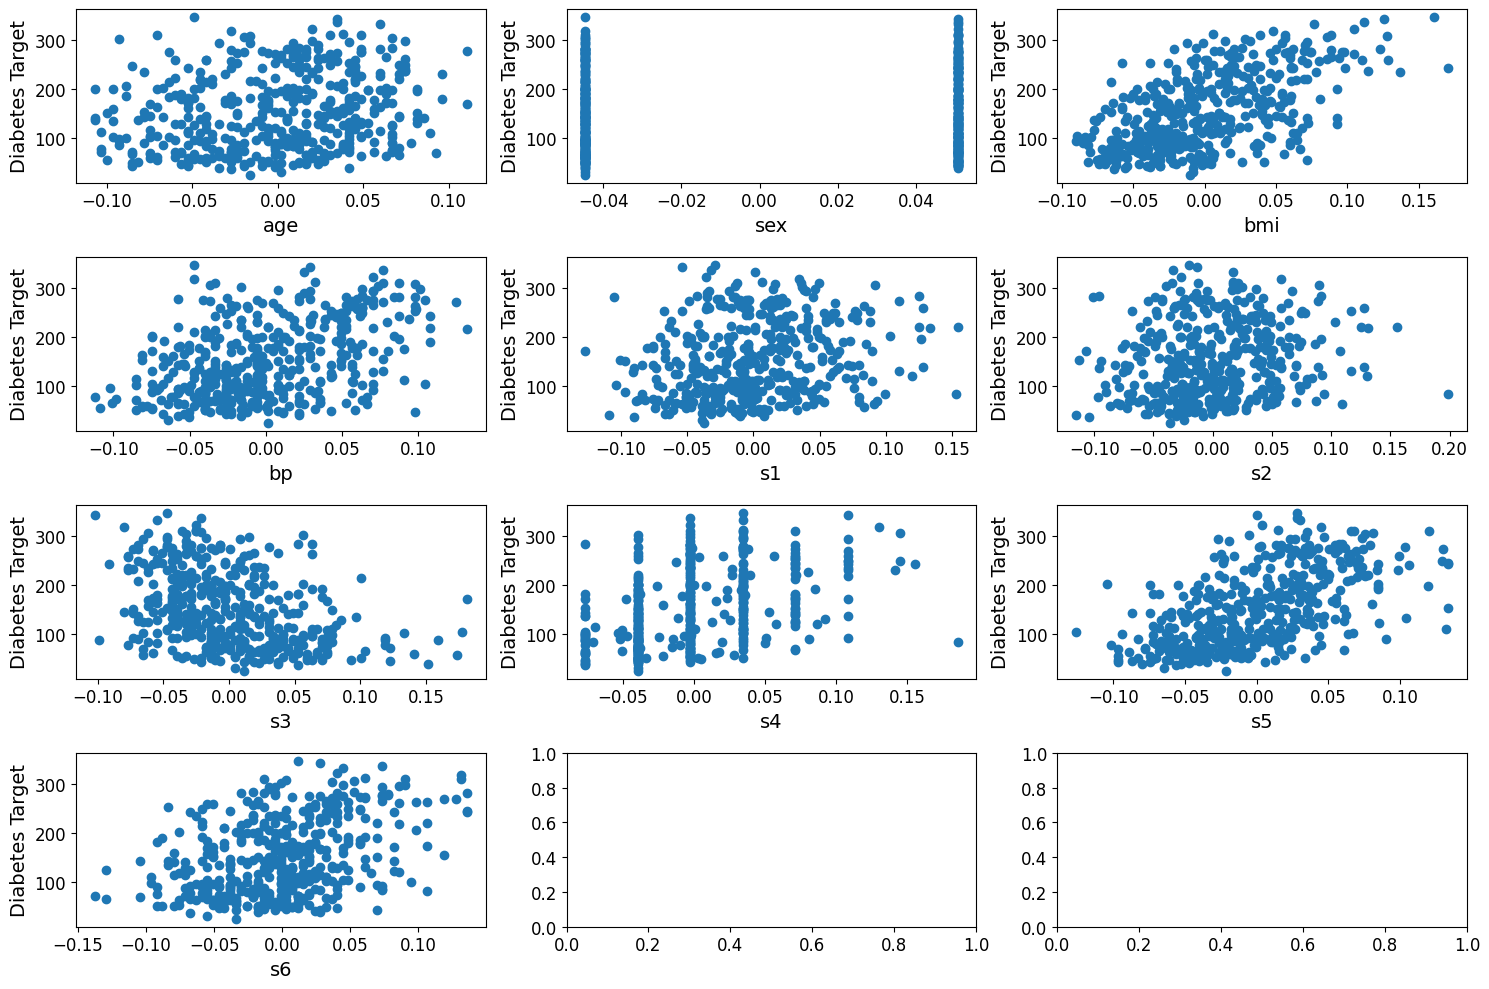

Saving figure scatter data correlation


<Figure size 640x480 with 0 Axes>

In [6]:
# Get the number of features
n_features = len(diabetes.feature_names)

# Calculate the number of rows and columns for the subplots
# to accommodate all features. We use ceiling division to ensure
# enough rows even if n_features is not perfectly divisible by 3.
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

# Iterate through each feature and plot it against the target
for i, feature_name in enumerate(diabetes.feature_names):
    row = i // n_cols  # Calculate row index based on n_cols
    col = i % n_cols   # Calculate column index based on n_cols

    # Check if axes is a 1D array (when n_rows or n_cols is 1)
    # and adjust indexing accordingly
    if axes.ndim == 1:
        ax = axes[i]
    else:
        ax = axes[row, col]

    ax.scatter(diabetes.data[:, i], diabetes.target)
    ax.set_xlabel(feature_name)
    ax.set_ylabel("Diabetes Target")

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()
save_fig('scatter data correlation')

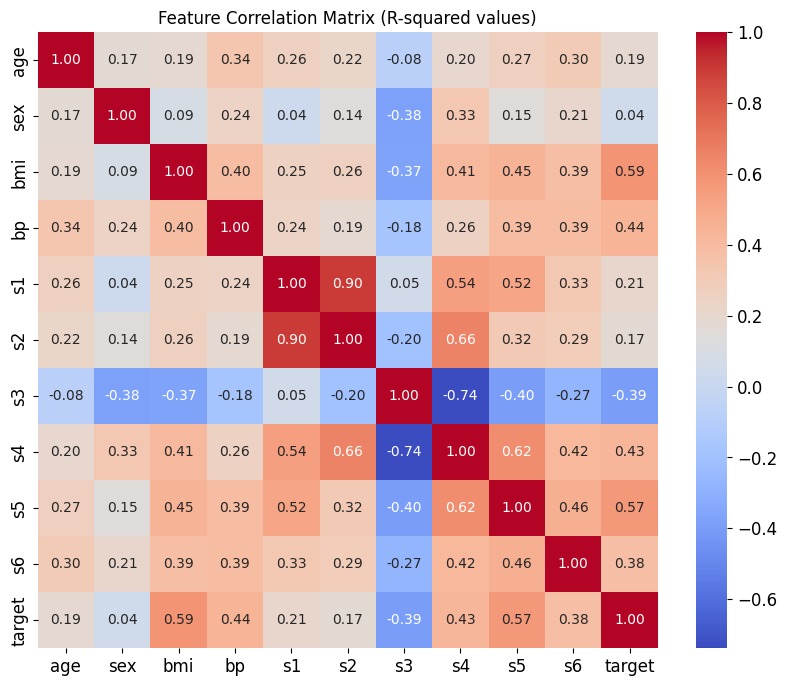

Saving figure r-squared correlation_heatmap


<Figure size 640x480 with 0 Axes>

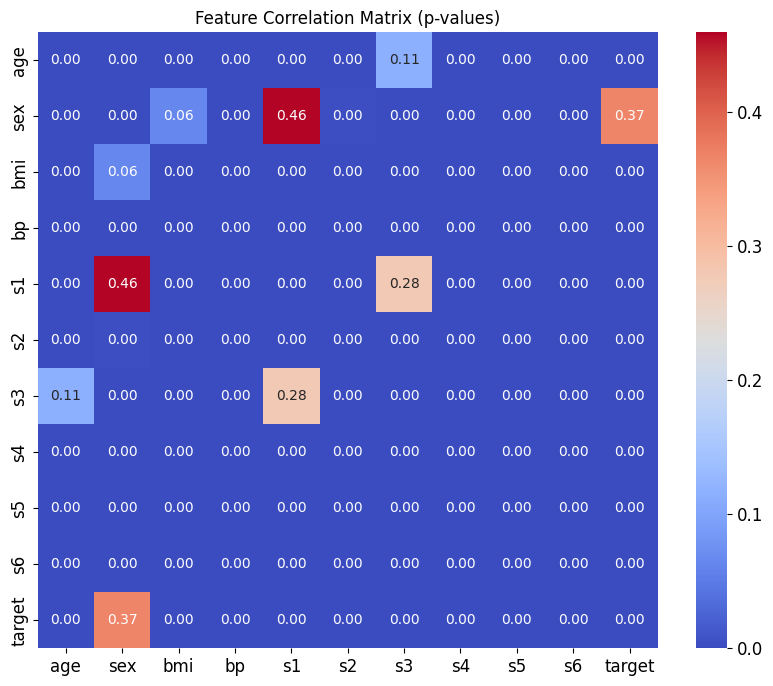

Saving figure p values correlation_heatmap


<Figure size 640x480 with 0 Axes>

In [11]:
# Convert the diabetes data to a pandas DataFrame for easier handling
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

# Calculate the correlation matrix
correlation_matrix = diabetes_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix (R-squared values)")
plt.show()
save_fig('r-squared correlation_heatmap')

# Calculate the p-values for the correlation matrix
p_values = diabetes_df.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(*diabetes_df.corr().shape)

# Plot the p-values as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(p_values, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix (p-values)")
plt.show()
save_fig('p values correlation_heatmap')

**Linear Regression with single input: BMI**

Trains a simple linear regression model using BMI as sole input.

Metrics:
* ***R²*** : score measures goodness-of-fit.
* ***MSE*** : (Mean Squared Error) estimates prediction error.


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [13]:
# Select BMI feature
X_bmi_train = X_train[['bmi']]
X_bmi_test = X_test[['bmi']]

Saving figure bmi_train_test_data


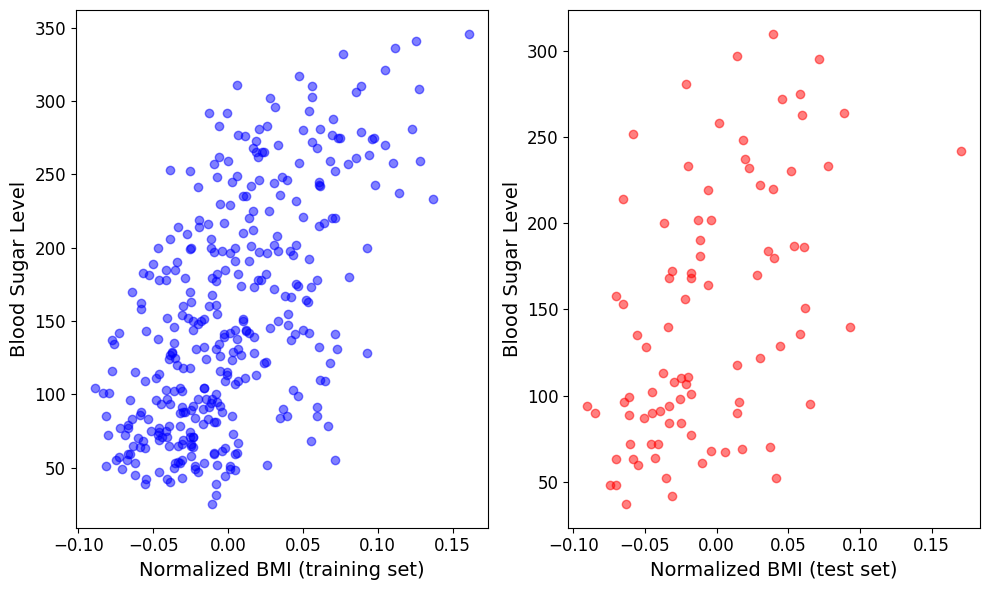

In [14]:
# Visualize training and testing data
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.scatter(X_bmi_train, y_train, color='blue', alpha=0.5)
plt.xlabel("Normalized BMI (training set)")
plt.ylabel("Blood Sugar Level")
plt.subplot(122)
plt.scatter(X_bmi_test, y_test, color='red', alpha=0.5)
plt.xlabel("Normalized BMI (test set)")
plt.ylabel("Blood Sugar Level")
save_fig('bmi_train_test_data')

In [15]:
# Train model
bmi_model = LinearRegression()
bmi_model.fit(X_bmi_train, y_train)

LinearRegression()

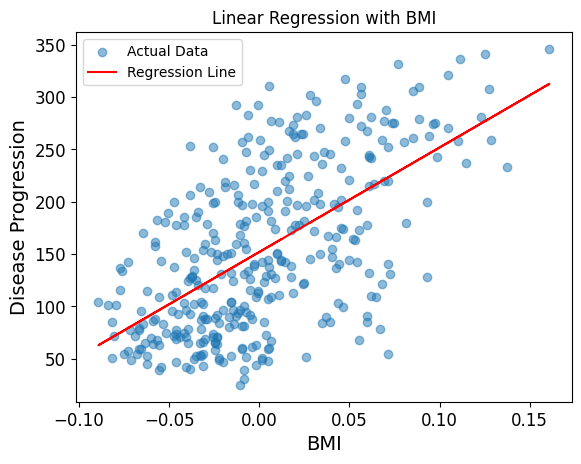

Saving figure bmi_train_results


<Figure size 640x480 with 0 Axes>

In [16]:
# Train predictions
y_pred_train = bmi_model.predict(X_bmi_train)

# Plot results
plt.scatter(X_bmi_train, y_train, label="Actual Data", alpha=0.5)
plt.plot(X_bmi_train, y_pred_train, color='red', label="Regression Line")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Linear Regression with BMI")
plt.legend()
plt.show()
save_fig('bmi_train_results')

In [18]:
# BMI model evaluation for training set
print(f"R^2 Score BMI model in training: {r2_score(y_train, y_pred_train):.4f}")
print(f"MSE BMI model in training: {mean_squared_error(y_train, y_pred_train):.2f}")

R^2 Score BMI model in training: 0.3657
MSE BMI model in training: 3854.11


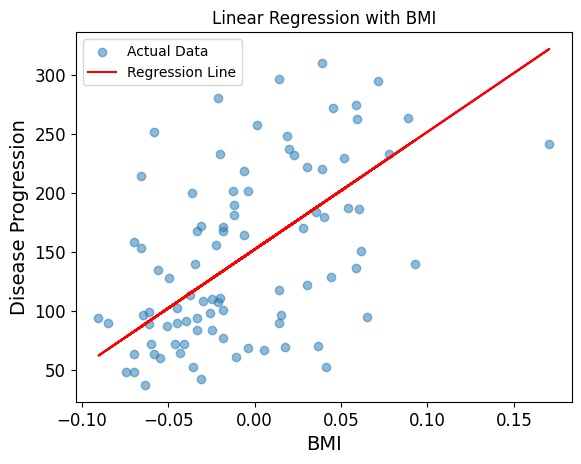

Saving figure bmi_test_results


<Figure size 640x480 with 0 Axes>

In [19]:
# Test predictions
y_pred_test = bmi_model.predict(X_bmi_test)

# Plot results
plt.scatter(X_bmi_test, y_test, label="Actual Data", alpha=0.5)
plt.plot(X_bmi_test, y_pred_test, color='red', label="Regression Line")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Linear Regression with BMI")
plt.legend()
plt.show()
save_fig('bmi_test_results')

In [20]:
# BMI model evaluation for testing set
print(f"R^2 Score BMI model in testing: {r2_score(y_test, y_pred_test):.4f}")
print(f"MSE BMI model in testing: {mean_squared_error(y_test, y_pred_test):.2f}")

R^2 Score BMI model in testing: 0.2334
MSE BMI model in testing: 4061.83


**Ridge and Lasso Regression**

* *Ridge Regression*: introduces a penalty term in the loss function during model training that "punishes" large model coefficient values in an attempt to reduce overfitting.
* *Lasso Regression*: another penalty term that can be introduce to the loss function to handicap very small model coefficients, helping in feature selection by attempting to set these coefficients to zero.

In [21]:
# Ridge Regression
bmi_ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
bmi_ridge_model.fit(X_bmi_train, y_train)
y_pred_train_ridge = bmi_ridge_model.predict(X_bmi_train)
y_pred_test_ridge = bmi_ridge_model.predict(X_bmi_test)

# Lasso Regression
bmi_lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization strength
bmi_lasso_model.fit(X_bmi_train, y_train)
y_pred_train_lasso = bmi_lasso_model.predict(X_bmi_train)
y_pred_test_lasso = bmi_lasso_model.predict(X_bmi_test)

print(f'Ordinary Regression  intercept:'+str(round(bmi_model.intercept_,2))+' and slope: '+str(round(bmi_model.coef_[0],2)))
print(f'Ridge intercept:'+str(round(bmi_ridge_model.intercept_,2))+' and slope: '+str(round(bmi_ridge_model.coef_[0],2)))
print(f'Lasso intercept:'+str(round(bmi_lasso_model.intercept_,2))+' and slope: '+str(round(bmi_lasso_model.coef_[0],2)))

Ordinary Regression  intercept:152.0 and slope: 998.58
Ridge intercept:152.97 and slope: 439.68
Lasso intercept:152.08 and slope: 953.71


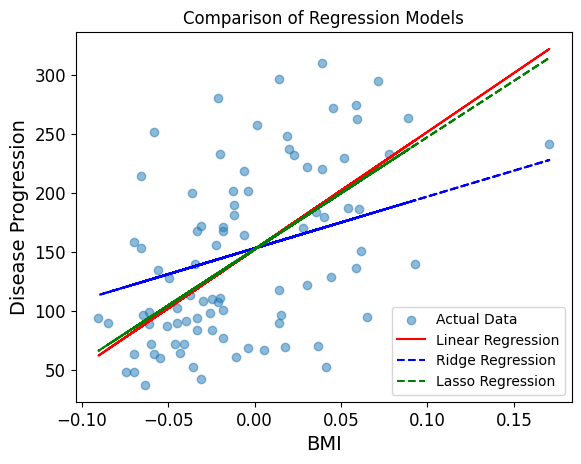

Saving figure bmi_regression_results_with_regularization


<Figure size 640x480 with 0 Axes>

In [22]:
# Plot results for testing set
plt.scatter(X_bmi_test, y_test, label="Actual Data", alpha=0.5)
plt.plot(X_bmi_test, y_pred_test, color='red', label="Linear Regression")
plt.plot(X_bmi_test, y_pred_test_ridge, color='blue', linestyle="--", label="Ridge Regression")
plt.plot(X_bmi_test, y_pred_test_lasso, color='green', linestyle="--", label="Lasso Regression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Comparison of Regression Models")
plt.legend()
plt.show()
save_fig('bmi_regression_results_with_regularization')

In [23]:
print(f'Mean Squared Error (Original regression): {mean_squared_error(y_test, y_pred_test)}')
print(f'Mean Squared Error (Ridge): {mean_squared_error(y_test, y_pred_test_ridge)}')
print(f'Mean Squared Error (Lasso): {mean_squared_error(y_test, y_pred_test_lasso)}')

Mean Squared Error (Original regression): 4061.8259284949268
Mean Squared Error (Ridge): 4196.651787171006
Mean Squared Error (Lasso): 4017.0287468800143


**Multivariable Regression**

Linear regression model considering all the available inputs.

In [24]:
# Ordinary Least Squares Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization strength
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [25]:
# Evaluate models
lr_predictions = lr_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

print(f'Mean Squared Error (OLS): {mean_squared_error(y_test, lr_predictions)}')
print(f'Mean Squared Error (Ridge): {mean_squared_error(y_test, ridge_predictions)}')
print(f'Mean Squared Error (Lasso): {mean_squared_error(y_test, lasso_predictions)}')

Mean Squared Error (OLS): 2900.193628493482
Mean Squared Error (Ridge): 3077.41593882723
Mean Squared Error (Lasso): 2798.193485169719


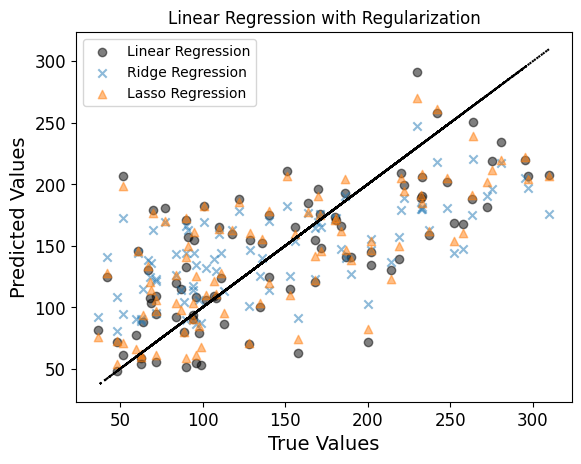

Saving figure multivariable_regression_results


<Figure size 640x480 with 0 Axes>

In [26]:
plt.scatter(y_test, lr_predictions, color='black', label='Linear Regression', alpha=0.5)
plt.scatter(y_test, ridge_predictions, marker='x', label='Ridge Regression', alpha=0.5)
plt.scatter(y_test, lasso_predictions, marker='^', label='Lasso Regression', alpha=0.5)
plt.plot(y_test,y_test,':k')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title('Linear Regression with Regularization')
plt.legend()
plt.show()
save_fig('multivariable_regression_results')

 **Exploring Different Function Forms**
 * *Polynomial Regression ('PolynomialFeatures')*:  tests different function forms (quadratic, cubic, etc.).
 * *GridSearchCV* : automates finding the best polynomial degree.

In [27]:
# Define pipeline and hyperparameter grid
pipeline = make_pipeline(PolynomialFeatures(), LinearRegression())
param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4, 5]}

# Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model
print(f"Best Polynomial Degree: {grid_search.best_params_['polynomialfeatures__degree']}")
print(f"Best R^2 Score: {grid_search.best_score_:.4f}")

Best Polynomial Degree: 1
Best R^2 Score: 0.4493
